# Análise de Regressão para Business Analytics

### Problema de Negócio

**Explorando Testes "Motor Trend Car Road"**

Neste projeto, trabalhamos para a Motor Trend (uma revista sobre a indústria automobilística) e vamos analisar o conjunto de dados mtcars. Observando um conjunto de dados de uma coleção de carros (que contém 32 observações), eles estão interessados em explorar a relação entre um conjunto de variáveis e a autonomia de combustível em milhas por galão (mpg), que é a nossa variável target.  <br/>

Estão particularmente interessados nestas duas questões:
* Qual tipo de transmissão consome menos combustível, automática ou manual?
* Quão diferente é o mpg entre as transmissões 'Automática' e 'Manual'?

**Conjunto de atributos:**
* **mpg**: Miles/gallon
* **cyl**: Number of cylinders
* **disp**: Displacement (cu.in.)
* **hp**: Gross horsepower
* **drat**: Rear axle ratio
* **wt**: Weight (1000 lbs)
* **qsec**: 1/4 mile time
* **vs**: V/S
* **am**: Transmission (0 = automatic, 1 = manual)
* **gear**: Number of forward gears
* **carb**: Number of carburetors

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [8]:
df = pd.read_csv('data/mtcars.csv')

### Análise Exploratória dos dados

In [9]:
df.head()

,Unnamed: 0,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
0,Mazda RX4,21.0,6,160.0,110,3.90,2.620,16.46,0,1,4,4
1,Mazda RX4 Wag,21.0,6,160.0,110,3.90,2.875,17.02,0,1,4,4
2,Datsun 710,22.8,4,108.0,93,3.85,2.320,18.61,1,1,4,1
3,Hornet 4 Drive,21.4,6,258.0,110,3.08,3.215,19.44,1,0,3,1
4,Hornet Sportabout,18.7,8,360.0,175,3.15,3.440,17.02,0,0,3,2


In [10]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
mpg,32.0,20.090625,6.026948,10.400,15.42500,19.200,22.80,33.900
cyl,32.0,6.187500,1.785922,4.000,4.00000,6.000,8.00,8.000
disp,32.0,230.721875,123.938694,71.100,120.82500,196.300,326.00,472.000
hp,32.0,146.687500,68.562868,52.000,96.50000,123.000,180.00,335.000
drat,32.0,3.596563,0.534679,2.760,3.08000,3.695,3.92,4.930
wt,32.0,3.217250,0.978457,1.513,2.58125,3.325,3.61,5.424
qsec,32.0,17.848750,1.786943,14.500,16.89250,17.710,18.90,22.900
vs,32.0,0.437500,0.504016,0.000,0.00000,0.000,1.00,1.000
am,32.0,0.406250,0.498991,0.000,0.00000,0.000,1.00,1.000
gear,32.0,3.687500,0.737804,3.000,3.00000,4.000,4.00,5.000


<AxesSubplot:>

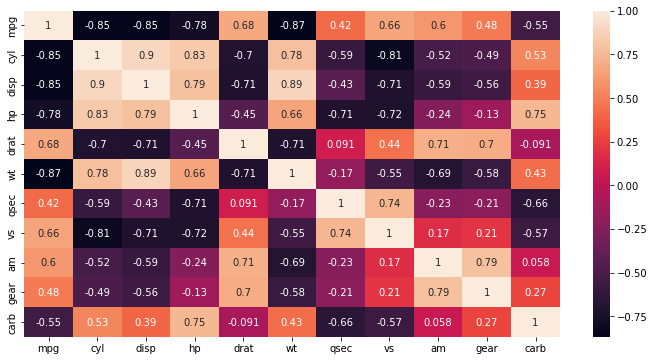

In [15]:
plt.figure(figsize=(12,6))
sns.heatmap(df.corr(), annot=True)

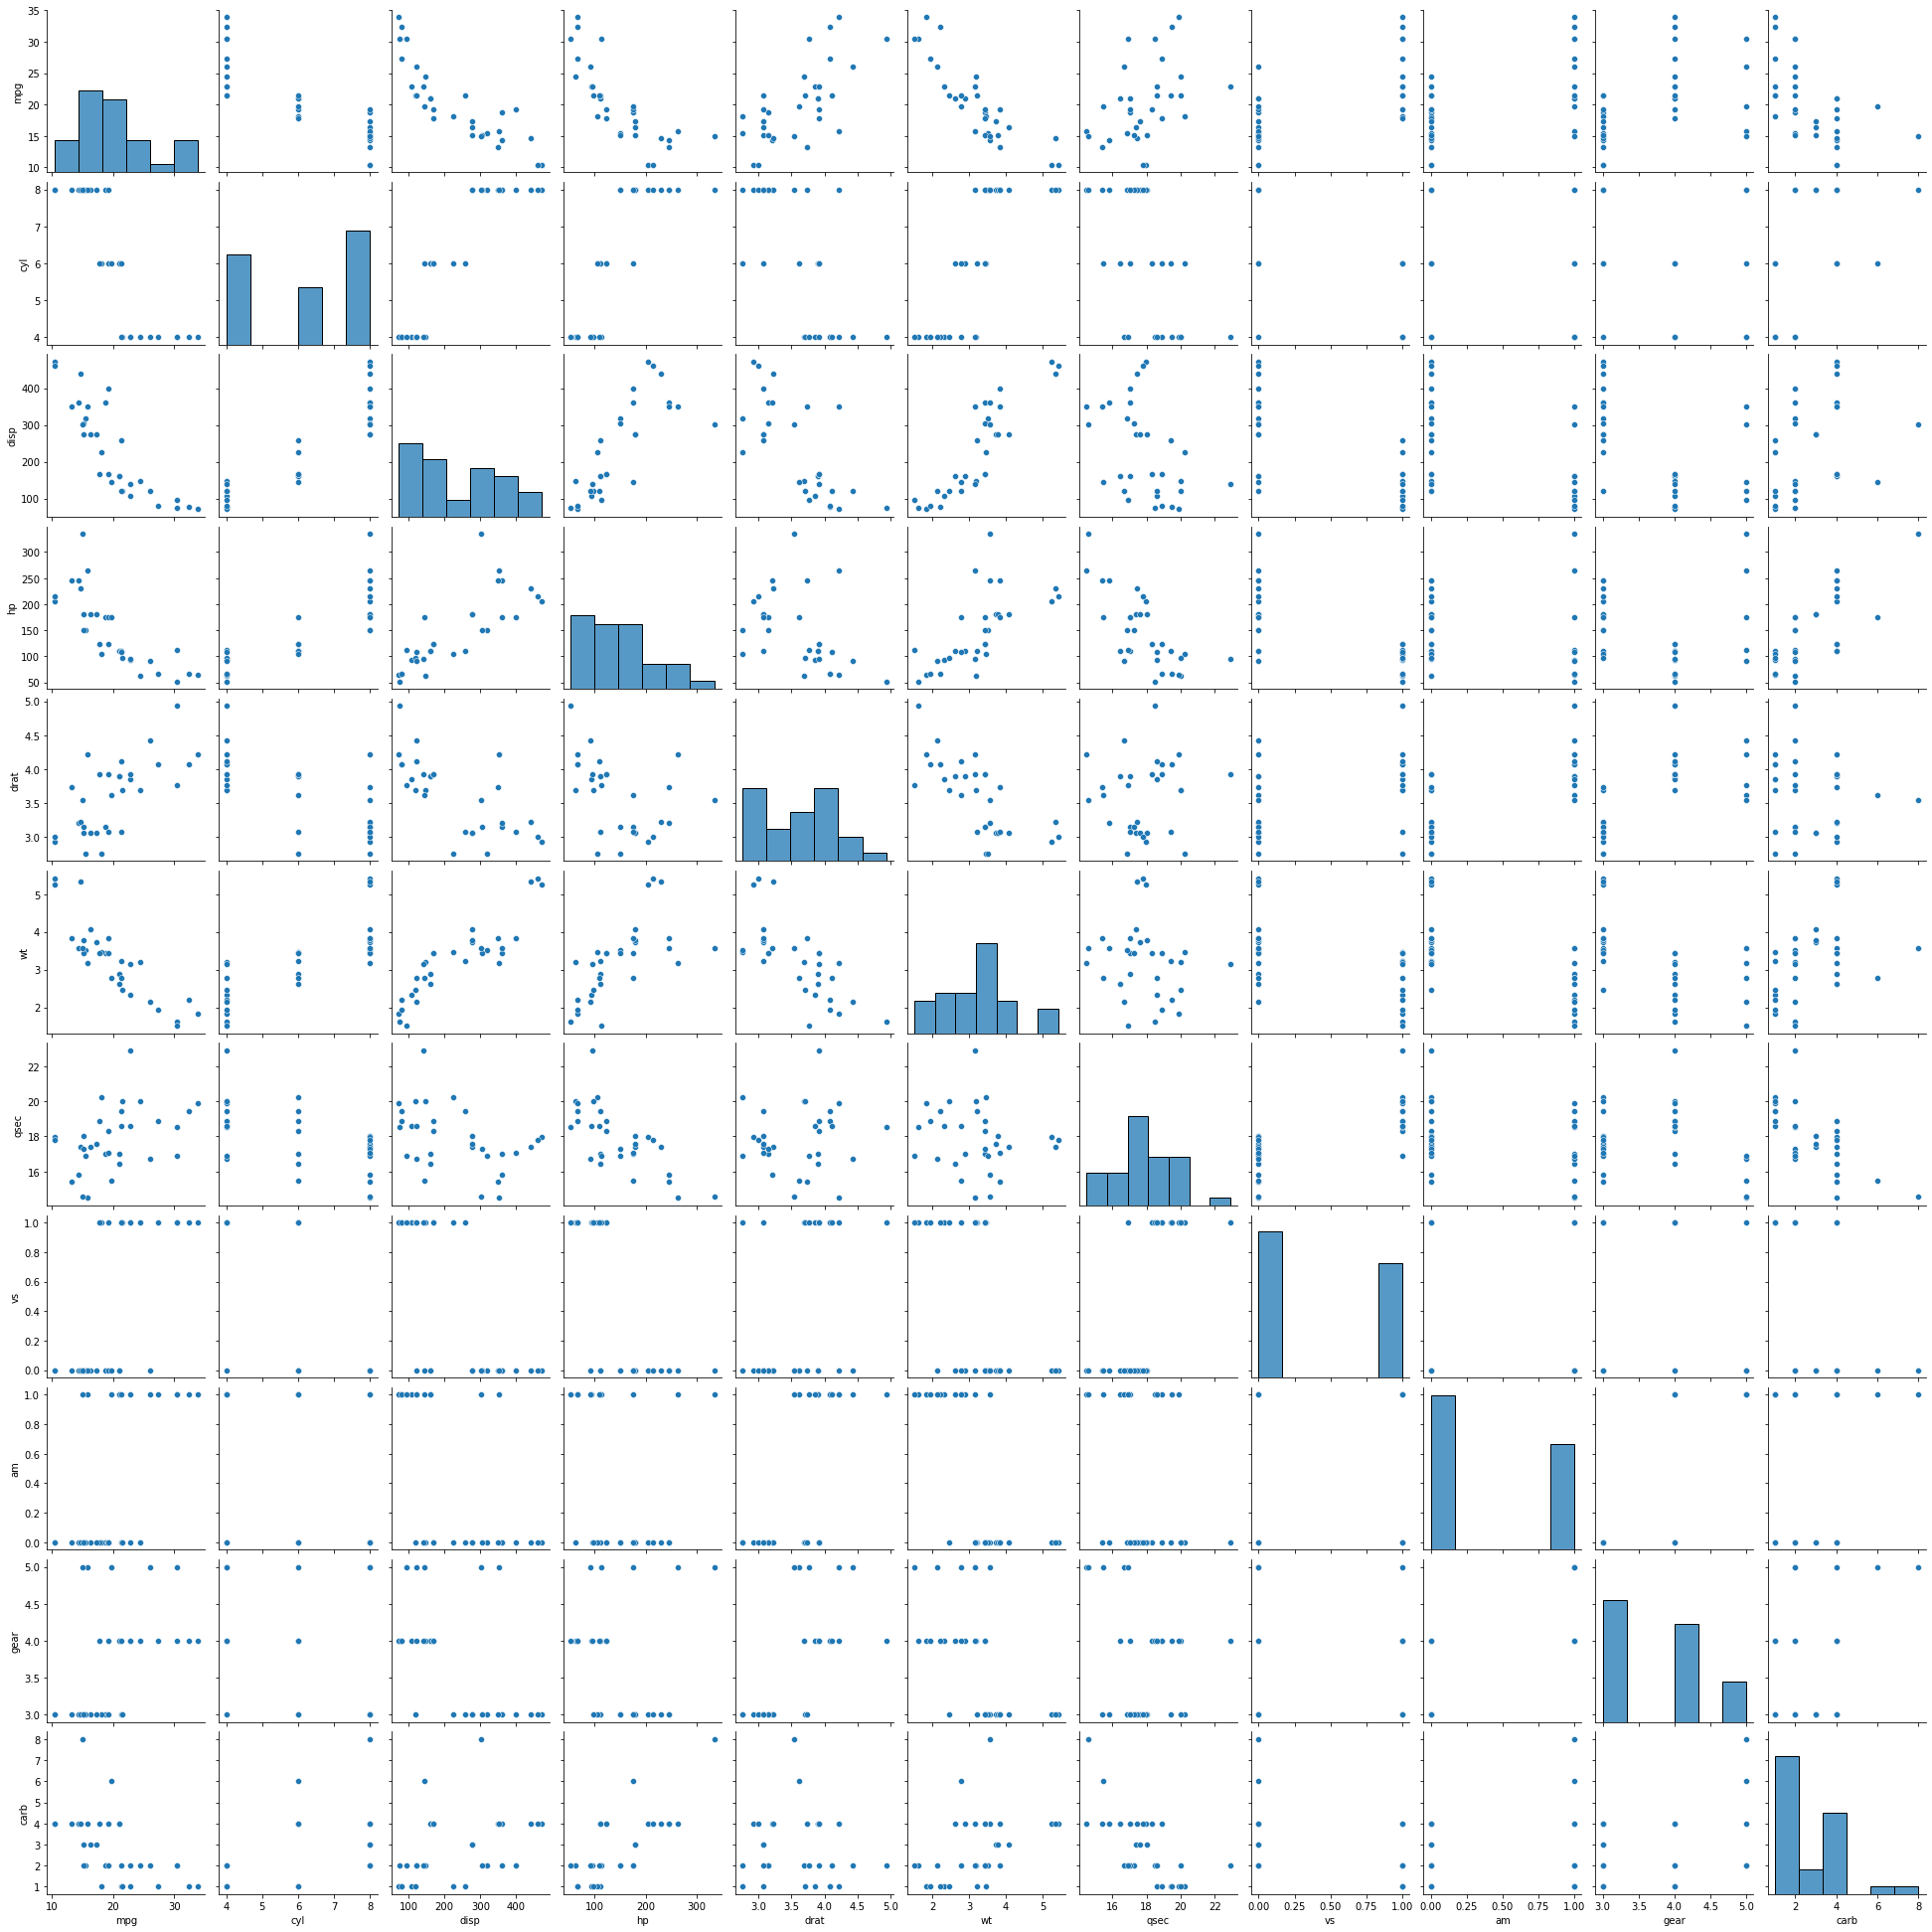

In [16]:
sns.pairplot(df)

### Extração e Transformação

**Em R:**

Inicialmennte carregamos o conjunto de dados, realizamos as transformações de dados necessárias, fatorizamos algumas variáveis e observando os dados:
> mtcars$cyl <- factor(mtcars$cyl) <br/>
> mtcars$vs <- factor(mtcars$vs) <br/>
> mtcars$gear <- factor(mtcars$gear) <br/>
> mtcars$carb <- factor(mtcars$carb) <br/>
> mtcars$am <- factor(mtcars$am,labels=c('Automatic','Manual')) <br/>

Resumo
> str(mtcars)

### Análise de Regressão

Nesta seção, vamos construir modelos de regressão linear com base nas diferentes variáveis de interesse e tentar descobrir o melhor modelo de ajuste. Vamos compará-lo com o modelo base que temos usando ANOVA. Após a seleção do modelo, realizaremos uma análise dos resíduos.

### Construção do Modelo

In [18]:
from sklearn import linear_model

In [24]:
a = df.drop(columns=['mpg'])
a

,Unnamed: 0,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
0,Mazda RX4,6,160.0,110,3.90,2.620,16.46,0,1,4,4
1,Mazda RX4 Wag,6,160.0,110,3.90,2.875,17.02,0,1,4,4
2,Datsun 710,4,108.0,93,3.85,2.320,18.61,1,1,4,1
3,Hornet 4 Drive,6,258.0,110,3.08,3.215,19.44,1,0,3,1
4,Hornet Sportabout,8,360.0,175,3.15,3.440,17.02,0,0,3,2
5,Valiant,6,225.0,105,2.76,3.460,20.22,1,0,3,1
6,Duster 360,8,360.0,245,3.21,3.570,15.84,0,0,3,4
7,Merc 240D,4,146.7,62,3.69,3.190,20.00,1,0,4,2
8,Merc 230,4,140.8,95,3.92,3.150,22.90,1,0,4,2
9,Merc 280,6,167.6,123,3.92,3.440,18.30,1,0,4,4


In [32]:
modelo = linear_model.LinearRegression()

X = df.drop(columns=['Unnamed: 0', 'mpg'])
Y = df['mpg']
modelo.fit(X, Y)

# Imprime os coeficientes
print (modelo.coef_)
print (modelo.intercept_)

[-0.11144048  0.01333524 -0.02148212  0.78711097 -3.71530393  0.82104075
  0.31776281  2.52022689  0.65541302 -0.19941925]
12.303374155996304


In [43]:
from sklearn.feature_selection import SelectKBest, chi2, f_classif

# chi-square
#top_10_features = SelectKBest(chi2, k=5).fit_transform(X, Y)

# or ANOVA
top_10_features = SelectKBest(f_classif, k=10)
top_10_features.fit(X, Y)

print(top_10_features.scores_)
print(top_10_features.pvalues_)

[ 6.91796875  3.40360704 11.1494294   1.36088832 13.37387624  2.10174982
  4.30208333  1.95963542  2.98958333  6.44791667]
[0.00677716 0.0502622  0.0015323  0.3551992  0.00085277 0.15751887
 0.02685813 0.18233184 0.06980942 0.00837326]


In [53]:
lista = ['cyl',	'disp', 'hp', 'drat', 'wt', 'qsec', 'vs', 'am', 'gear', 'carb']
valores = top_10_features.pvalues_
list(sorted(zip(lista, valores), key = lambda x: x[1], reverse=True))

[('drat', 0.3551992003017883),
 ('am', 0.18233184289203447),
 ('qsec', 0.15751887085629304),
 ('gear', 0.06980942481396978),
 ('disp', 0.050262199238804726),
 ('vs', 0.026858128812630517),
 ('carb', 0.008373256094187018),
 ('cyl', 0.0067771633672074815),
 ('hp', 0.0015322980410966197),
 ('wt', 0.0008527732964761742)]

Com base na matriz de correlação, existem diversas variáveis que parecem ter alta correlação com mpg. 
Iremos construir um modelo inicial com todas as variáveis como preditores e usaremos o método de seleção stepwise para selecionar os preditores mais sgnificantes para a versão final do modelo. Isto é obtido pelo método stepwise, que executa a função lm() várias vezes para construir modelos de regressão múltipla e selecionar as melhores variáveis a partir deles, usando tanto a seleção direta (forward selection) e métodos de eliminação (backward elimination) através do algoritmo AIC.

### Análise dos Residuais e Diagnósticos

Agora exploramos os plots dos resíduos do nosso modelo de regressão e também calculamos alguns dos diagnósticos de regressão de nosso modelo para descobrir outliers no conjunto de dados:

In [57]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

In [62]:
df_temp = df.drop(columns='Unnamed: 0')

                            OLS Regression Results                            
Dep. Variable:                    mpg   R-squared:                       0.869
Model:                            OLS   Adj. R-squared:                  0.807
Method:                 Least Squares   F-statistic:                     13.93
Date:                Fri, 24 Jun 2022   Prob (F-statistic):           3.79e-07
Time:                        14:44:23   Log-Likelihood:                -69.855
No. Observations:                  32   AIC:                             161.7
Df Residuals:                      21   BIC:                             177.8
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     12.3034     18.718      0.657      0.5

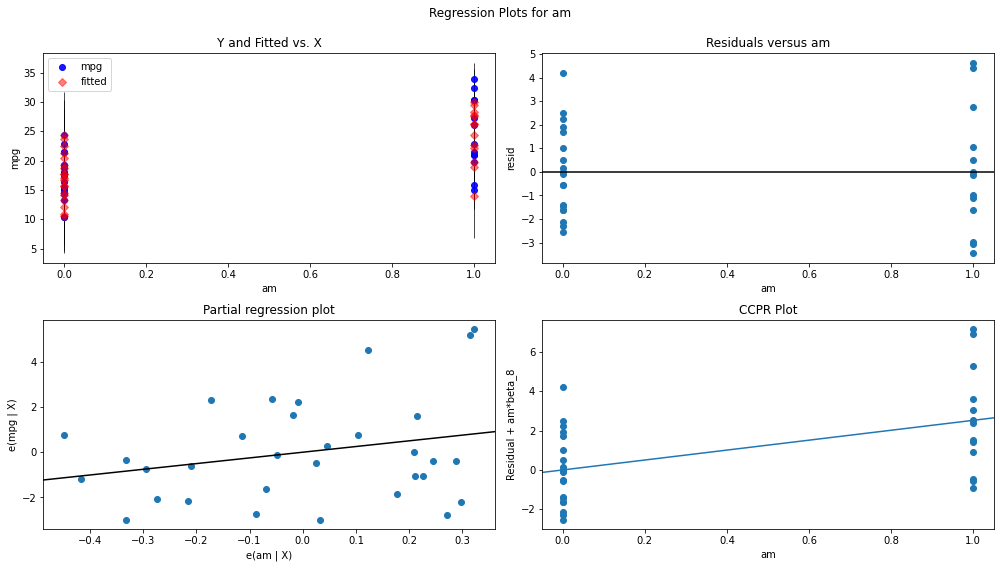

In [76]:
# fit simple linear regression model
linear_model = ols('mpg ~  cyl + disp + hp + drat + wt + qsec + vs + am + gear + carb',data=df_temp).fit()
  
# display model summary
print(linear_model.summary())
  
# modify figure size
fig = plt.figure(figsize=(14, 8))
  
# creating regression plots
fig = sm.graphics.plot_regress_exog(linear_model,'am', fig=fig)

A partir destes plots podemos concluir o seguinte:

O gráfico Residuals vs Fitted mostra pontos aleatórios no gráfico que verifica a condição de independência.<br/>
Na plot Normal Q-Q os pontos caem principalmente sobre a linha indicando que os resíduos são normalmente distribuídos.<br/>
No gráfico Scale-Location os pontos estão em um padrão constante, indicando variância constante.<br/>
Finalmente, o gráfico Residuals vs Leverage mostra alguns pontos de interesse (outliers ou pontos de alavancagem) estão no canto superior direito.

Agora vamos calcular alguns diagnósticos de regressão do nosso modelo para descobrir quais são os outliers. 
Calculamos os três primeiros pontos em cada caso de medidas de influência.<br/>
Em R: lev <- hatvalues(mod_best)<br/>
Em R: tail(sort(lev),3)<br/>

inf <- dfbetas(mod_best)<br/>
tail(sort(inf[,3]),3)<br/>

Olhando para este resultado vemos que eles são os mesmos carros mostrados nos Plots dos resíduos.

**Inferência Estatística**<br/>
Finalmente, realizaremos um teste t assumindo que os dados de transmissão têm uma distribuição normal e veremos que as transmissões manuais e automáticas são significativamente diferentes:<br/>
Em R: t.test(mpg ~ am, data = mtcars)

### Conclusões

A partir do resumo (mod_best) podemos concluir o seguinte:<br/>
Em R: coefficients(mod_best)<br/>
Em R: confint(mod_best)<br/>
Em R: fitted(mod_best)<br/>
Em R: influence(mod_best)<br/>

Em R: par(mfrow=c(2,2))<br/>
Em R: termplot(mod_best)

* Milhas por galão (mpg) irá aumentar em 1.81 em carros com transmissão 'Manual' em comparação com carros com transmissão 'Automatic' (ajustado por hp, cyl e wt).<br/>
Conclusão para a Motor Trend Magazine é: 'Transmissão manual' é melhor para mpg.

* Milhas por galão (mpg) irá diminuir em 2,5 por cada 1000 lb de aumento em peso (ajustado por hp, cyl e am).<br/>
Conclusão: Milhas por galão (mpg) diminui com aumento de wt.

* Milhas por galão (mpg) irá diminuir em um fator de 3 e 2,2 se o número de cilindros cyl <br/>
aumentar de 4 para 6 e 8, respectivamente (ajustado por hp, wt e am).